# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [5]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [9]:
# Import essential libraries
# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

# Deep Learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("All libraries imported successfully!")
print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")


All libraries imported successfully!
TensorFlow version: 2.16.2
Keras version: 3.10.0


Load the dataset.

In [10]:
# Load and unzip the dataset

# Load and setup the dataset
data_dir = 'data'

# Verify data directory exists
if os.path.exists(data_dir):
    print(f"Data directory found: {data_dir}")
    print(f"Classes found: {os.listdir(data_dir)}")
else:
    print("Data directory not found. Please ensure the data folder is in the current directory.")

Data directory found: data
Classes found: ['Paper', 'Food_Waste', 'Metal', 'Cardboard', 'Other', 'Glass', 'Plastic']


## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [11]:
# Create a function to load the raw images
# Create a function to load the raw images
def load_images_from_directory(data_dir, target_size=(224, 224)):
    """
    Load images and labels from directory structure
    """
    images = []
    labels = []
    
    class_names = os.listdir(data_dir)
    class_names = [name for name in class_names if os.path.isdir(os.path.join(data_dir, name))]
    class_names.sort()  # Ensure consistent ordering
    
    print(f"Found {len(class_names)} classes: {class_names}")
    
    for class_name in class_names:
        class_dir = os.path.join(data_dir, class_name)
        image_files = [f for f in os.listdir(class_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        
        print(f"Loading {len(image_files)} images from {class_name}...")
        
        for image_file in image_files:
            try:
                image_path = os.path.join(class_dir, image_file)
                image = cv2.imread(image_path)
                if image is not None:
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    image = cv2.resize(image, target_size)
                    images.append(image)
                    labels.append(class_name)
            except Exception as e:
                print(f"Error loading {image_path}: {e}")
    
    print(f"Total images loaded: {len(images)}")
    return np.array(images), np.array(labels), class_names


#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [12]:
# Get the images and their labels

# Get the images and their labels
print("Loading images from dataset...")
images, labels, class_names = load_images_from_directory('data', target_size=(224, 224))

print(f"\nDataset Summary:")
print(f"Total images: {len(images)}")
print(f"Image shape: {images[0].shape}")
print(f"Number of classes: {len(class_names)}")
print(f"Classes: {class_names}")
print(f"Labels shape: {labels.shape}")
print(f"Sample labels: {labels[:5]}")

Loading images from dataset...
Found 7 classes: ['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic']
Loading 540 images from Cardboard...
Loading 1000 images from Food_Waste...
Loading 750 images from Glass...
Loading 1000 images from Metal...
Loading 1010 images from Other...
Loading 1030 images from Paper...
Loading 2295 images from Plastic...
Total images loaded: 7625

Dataset Summary:
Total images: 7625
Image shape: (224, 224, 3)
Number of classes: 7
Classes: ['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic']
Labels shape: (7625,)
Sample labels: ['Cardboard' 'Cardboard' 'Cardboard' 'Cardboard' 'Cardboard']


Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

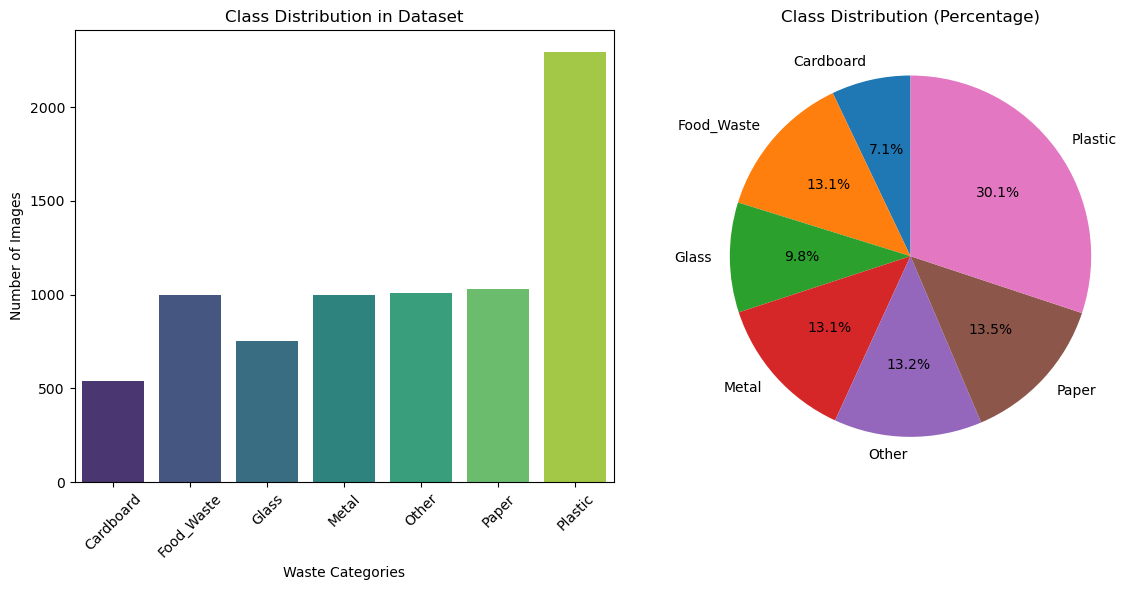


Class Distribution:
Cardboard: 540 images (7.1%)
Food_Waste: 1000 images (13.1%)
Glass: 750 images (9.8%)
Metal: 1000 images (13.1%)
Other: 1010 images (13.2%)
Paper: 1030 images (13.5%)
Plastic: 2295 images (30.1%)


In [13]:
# Visualise Data Distribution
# Visualise Data Distribution
plt.figure(figsize=(12, 6))

# Count images per class
unique_labels, counts = np.unique(labels, return_counts=True)
class_distribution = pd.DataFrame({'Class': unique_labels, 'Count': counts})

# Create bar plot
plt.subplot(1, 2, 1)
sns.barplot(data=class_distribution, x='Class', y='Count', palette='viridis')
plt.title('Class Distribution in Dataset')
plt.xlabel('Waste Categories')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)

# Create pie chart
plt.subplot(1, 2, 2)
plt.pie(counts, labels=unique_labels, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution (Percentage)')

plt.tight_layout()
plt.show()

# Print distribution statistics
print("\nClass Distribution:")
for class_name, count in zip(unique_labels, counts):
    percentage = (count / len(labels)) * 100
    print(f"{class_name}: {count} images ({percentage:.1f}%)")


#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

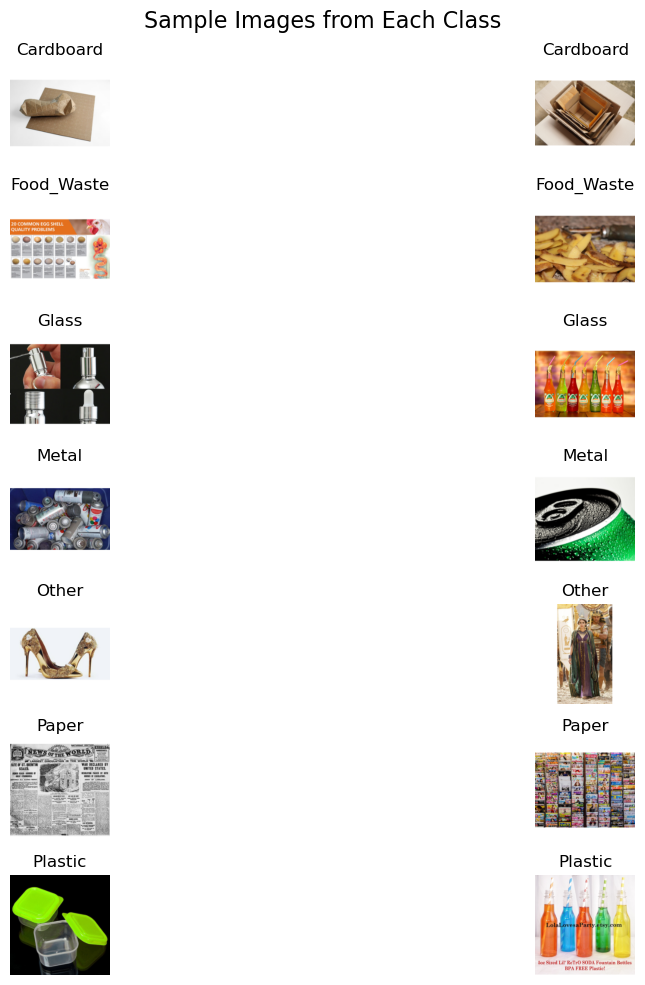

In [14]:
# Visualise Sample Images (across different labels)

# Visualise Sample Images (across different labels)
plt.figure(figsize=(15, 10))

# Display 2 samples from each class
samples_per_class = 2
total_samples = len(class_names) * samples_per_class

for i, class_name in enumerate(class_names):
    # Get indices of images for this class
    class_indices = np.where(labels == class_name)[0]
    
    # Select random samples
    if len(class_indices) >= samples_per_class:
        selected_indices = np.random.choice(class_indices, samples_per_class, replace=False)
    else:
        selected_indices = class_indices
    
    # Display images
    for j, idx in enumerate(selected_indices):
        plt.subplot(len(class_names), samples_per_class, i * samples_per_class + j + 1)
        plt.imshow(images[idx])
        plt.title(f'{class_name}')
        plt.axis('off')

plt.suptitle('Sample Images from Each Class', fontsize=16)
plt.tight_layout()
plt.show()

#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [15]:
# Find the smallest and largest image dimensions from the data set

# Find the smallest and largest image dimensions from the data set
print("Analyzing image dimensions...")

# Since we already resized to (224, 224), let's check original dimensions from a sample
original_sizes = []
sample_files = []

for class_name in class_names[:3]:  # Check first 3 classes for efficiency
    class_dir = os.path.join('data', class_name)
    image_files = [f for f in os.listdir(class_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    for image_file in image_files[:5]:  # Check first 5 images per class
        image_path = os.path.join(class_dir, image_file)
        try:
            with Image.open(image_path) as img:
                original_sizes.append(img.size)  # (width, height)
                sample_files.append(image_path)
        except Exception as e:
            continue

if original_sizes:
    widths = [size[0] for size in original_sizes]
    heights = [size[1] for size in original_sizes]
    
    print(f"Sample of original image dimensions:")
    print(f"Width range: {min(widths)} - {max(widths)} pixels")
    print(f"Height range: {min(heights)} - {max(heights)} pixels")
    print(f"Average width: {np.mean(widths):.1f} pixels")
    print(f"Average height: {np.mean(heights):.1f} pixels")
else:
    print("Could not analyze original dimensions")

print(f"\nCurrent processed image shape: {images[0].shape}")

Analyzing image dimensions...
Sample of original image dimensions:
Width range: 256 - 256 pixels
Height range: 256 - 256 pixels
Average width: 256.0 pixels
Average height: 256.0 pixels

Current processed image shape: (224, 224, 3)


In [16]:
# Resize the image dimensions

# Resize the image dimensions
# Images are already resized to (224, 224) during loading
# Let's normalize the pixel values to [0, 1] range

print("Normalizing image pixel values...")
images_normalized = images.astype('float32') / 255.0

print(f"Original pixel value range: {images.min()} - {images.max()}")
print(f"Normalized pixel value range: {images_normalized.min():.3f} - {images_normalized.max():.3f}")
print(f"Final image shape: {images_normalized.shape}")

# Update our images array
images = images_normalized

Normalizing image pixel values...
Original pixel value range: 0 - 255
Normalized pixel value range: 0.000 - 1.000
Final image shape: (7625, 224, 224, 3)


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [17]:
# Encode the labels suitably
# Encode the labels suitably
print("Encoding labels...")

# Use LabelEncoder for integer encoding
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Convert to categorical (one-hot encoding) for multi-class classification
labels_categorical = to_categorical(labels_encoded, num_classes=len(class_names))

print(f"Original labels (first 10): {labels[:10]}")
print(f"Integer encoded labels (first 10): {labels_encoded[:10]}")
print(f"One-hot encoded shape: {labels_categorical.shape}")
print(f"Number of classes: {len(class_names)}")

# Create label mapping
label_mapping = dict(zip(range(len(class_names)), label_encoder.classes_))
print(f"Label mapping: {label_mapping}")


Encoding labels...
Original labels (first 10): ['Cardboard' 'Cardboard' 'Cardboard' 'Cardboard' 'Cardboard' 'Cardboard'
 'Cardboard' 'Cardboard' 'Cardboard' 'Cardboard']
Integer encoded labels (first 10): [0 0 0 0 0 0 0 0 0 0]
One-hot encoded shape: (7625, 7)
Number of classes: 7
Label mapping: {0: 'Cardboard', 1: 'Food_Waste', 2: 'Glass', 3: 'Metal', 4: 'Other', 5: 'Paper', 6: 'Plastic'}


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [18]:

# Assign specified parts of the dataset to train and validation sets
print("Splitting dataset into train and validation sets...")

# Split the data: 80% training, 20% validation
X_train, X_val, y_train, y_val = train_test_split(
    images, 
    labels_categorical, 
    test_size=0.2, 
    random_state=42, 
    stratify=labels_encoded
)

print(f"Training set: {X_train.shape[0]} images")
print(f"Validation set: {X_val.shape[0]} images")
print(f"Training labels shape: {y_train.shape}")
print(f"Validation labels shape: {y_val.shape}")

# Verify class distribution in splits
train_labels_decoded = np.argmax(y_train, axis=1)
val_labels_decoded = np.argmax(y_val, axis=1)

print("\nClass distribution in training set:")
train_unique, train_counts = np.unique(train_labels_decoded, return_counts=True)
for i, count in zip(train_unique, train_counts):
    print(f"{label_mapping[i]}: {count} ({count/len(train_labels_decoded)*100:.1f}%)")

print("\nClass distribution in validation set:")
val_unique, val_counts = np.unique(val_labels_decoded, return_counts=True)
for i, count in zip(val_unique, val_counts):
    print(f"{label_mapping[i]}: {count} ({count/len(val_labels_decoded)*100:.1f}%)")


Splitting dataset into train and validation sets...
Training set: 6100 images
Validation set: 1525 images
Training labels shape: (6100, 7)
Validation labels shape: (1525, 7)

Class distribution in training set:
Cardboard: 432 (7.1%)
Food_Waste: 800 (13.1%)
Glass: 600 (9.8%)
Metal: 800 (13.1%)
Other: 808 (13.2%)
Paper: 824 (13.5%)
Plastic: 1836 (30.1%)

Class distribution in validation set:
Cardboard: 108 (7.1%)
Food_Waste: 200 (13.1%)
Glass: 150 (9.8%)
Metal: 200 (13.1%)
Other: 202 (13.2%)
Paper: 206 (13.5%)
Plastic: 459 (30.1%)


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [19]:
# Build and compile the model

# Build and compile the model - Model 1: Basic CNN
print("Building Model 1: Basic CNN...")

def create_basic_cnn(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Create Model 1
model_1 = create_basic_cnn(input_shape=(224, 224, 3), num_classes=len(class_names))

# Compile the model
model_1.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Model 1 Summary:")
model_1.summary()

Building Model 1: Basic CNN...
Model 1 Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,863 (42.61 MB)

 Trainable params: 11,169,863 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Build Model 2: Enhanced CNN with Regularization
print("Building Model 2: Enhanced CNN with Regularization...")

def create_enhanced_cnn(input_shape, num_classes):
    model = models.Sequential([
        # First Convolutional Block
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        
        # Second Convolutional Block
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        
        # Third Convolutional Block
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        
        # Fourth Convolutional Block
        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        
        # Global Average Pooling instead of Flatten
        layers.GlobalAveragePooling2D(),
        
        # Dense layers with regularization
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Create Model 2
model_2 = create_enhanced_cnn(input_shape=(224, 224, 3), num_classes=len(class_names))

# Compile the model
model_2.compile(
    optimizer=optimizers.Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Model 2 Summary:")
model_2.summary()

Building Model 2: Enhanced CNN with Regularization...
Model 2 Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 655,047 (2.50 MB)

 Trainable params: 654,087 (2.50 MB)

 Non-trainable params: 960 (3.75 KB)

In [23]:
# Build Model 3: Transfer Learning with VGG16
print("Building Model 3: Transfer Learning (VGG16)...")

def create_transfer_learning_model(input_shape, num_classes):
    # Load VGG16 base model
    base_model = VGG16(
        weights='imagenet',
        include_top=False,
        input_shape=input_shape
    )
    
    # Freeze base model layers initially
    base_model.trainable = False
    
    # Add custom classifier
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    return model, base_model

# Create Model 3
model_3, base_model_3 = create_transfer_learning_model(
    input_shape=(224, 224, 3), 
    num_classes=len(class_names)
)

# Compile the model
model_3.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Model 3 Summary:")
model_3.summary()
print(f"Total trainable parameters: {model_3.count_params()}")

Building Model 3: Transfer Learning (VGG16)...
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 20s 0us/step
Model 3 Summary:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,110,471 (57.64 MB)

 Trainable params: 395,783 (1.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Total trainable parameters: 15110471


#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [20]:
# Training
# Training Model 1
print("Training Model 1: Basic CNN...")

# Define callbacks
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=0.0001
)

# Train the model
history_1 = model_1.fit(
    X_train, y_train,
    batch_size=32,
    epochs=15,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

print("Model 1 training completed!")

Training Model 1: Basic CNN...
Epoch 1/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 67s 349ms/step - accuracy: 0.2738 - loss: 2.1602 - val_accuracy: 0.3711 - val_loss: 1.6760 - learning_rate: 0.0010
Epoch 2/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 76s 399ms/step - accuracy: 0.3726 - loss: 1.6869 - val_accuracy: 0.4111 - val_loss: 1.5291 - learning_rate: 0.0010
Epoch 3/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 88s 460ms/step - accuracy: 0.4484 - loss: 1.4663 - val_accuracy: 0.4866 - val_loss: 1.4117 - learning_rate: 0.0010
Epoch 4/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 97s 509ms/step - accuracy: 0.5410 - loss: 1.2560 - val_accuracy: 0.5082 - val_loss: 1.4447 - learning_rate: 0.0010
Epoch 5/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 95s 499ms/step - accuracy: 0.6187 - loss: 1.0770 - val_accuracy: 0.5252 - val_loss: 1.4610 - learning_rate: 0.0010
Epoch 6/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 100s 526ms/step - accuracy: 0.6630 - loss: 0.9170 - val_accuracy: 0.5574 - val_loss: 1.5836 - learning_rate: 0.0010
Epoch 7/15
191/191 ━━━━━━━━━━━━━━━━━━━

In [22]:
# Training Model 2
print("Training Model 2: Enhanced CNN...")

# Train the model
history_2 = model_2.fit(
    X_train, y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

print("Model 2 training completed!")

Training Model 2: Enhanced CNN...
Epoch 1/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 199s 1s/step - accuracy: 0.3178 - loss: 1.7955 - val_accuracy: 0.1875 - val_loss: 2.0304 - learning_rate: 5.0000e-04
Epoch 2/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.4108 - loss: 1.5525 - val_accuracy: 0.3180 - val_loss: 1.8286 - learning_rate: 5.0000e-04
Epoch 3/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 210s 1s/step - accuracy: 0.4582 - loss: 1.4682 - val_accuracy: 0.3849 - val_loss: 1.6588 - learning_rate: 5.0000e-04
Epoch 4/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 216s 1s/step - accuracy: 0.4836 - loss: 1.3820 - val_accuracy: 0.3679 - val_loss: 1.8378 - learning_rate: 5.0000e-04
Epoch 5/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - accuracy: 0.5145 - loss: 1.3262 - val_accuracy: 0.4452 - val_loss: 1.4521 - learning_rate: 5.0000e-04
Epoch 6/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - accuracy: 0.5433 - loss: 1.2495 - val_accuracy: 0.4538 - val_loss: 1.4929 - learning_rate: 5.0000e-04
Epoch 7/20
191/191 ━━━━━

In [24]:
# Training Model 3 - Stage 1: Feature Extraction
print("Training Model 3 - Stage 1: Feature Extraction (VGG16 frozen)...")

# Train with frozen base model
history_3_stage1 = model_3.fit(
    X_train, y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

print("Stage 1 training completed!")

Training Model 3 - Stage 1: Feature Extraction (VGG16 frozen)...
Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 766s 4s/step - accuracy: 0.3617 - loss: 1.6613 - val_accuracy: 0.5862 - val_loss: 1.1087 - learning_rate: 0.0010
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 752s 4s/step - accuracy: 0.5849 - loss: 1.1203 - val_accuracy: 0.6682 - val_loss: 0.9323 - learning_rate: 0.0010
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 768s 4s/step - accuracy: 0.6523 - loss: 0.9586 - val_accuracy: 0.6951 - val_loss: 0.8615 - learning_rate: 0.0010
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1484s 8s/step - accuracy: 0.6783 - loss: 0.8708 - val_accuracy: 0.7161 - val_loss: 0.8144 - learning_rate: 0.0010
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 837s 4s/step - accuracy: 0.7166 - loss: 0.7996 - val_accuracy: 0.6997 - val_loss: 0.8240 - learning_rate: 0.0010
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 884s 5s/step - accuracy: 0.7223 - loss: 0.7657 - val_accuracy: 0.7226 - val_loss: 0.7635 - learning_rate: 0.0010
Epoch 7/10
191/1

In [25]:
# Training Model 3 - Stage 2: Fine Tuning
print("Training Model 3 - Stage 2: Fine Tuning (unfreezing last layers)...")

# Unfreeze the last 4 layers of VGG16
base_model_3.trainable = True

# Fine-tune from this layer onwards
fine_tune_at = len(base_model_3.layers) - 4

# Freeze all the layers before fine_tune_at
for layer in base_model_3.layers[:fine_tune_at]:
    layer.trainable = False

# Recompile with lower learning rate
model_3.compile(
    optimizer=optimizers.Adam(learning_rate=0.0001),  # Lower learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print(f"Number of trainable layers after unfreezing: {len([l for l in model_3.layers if l.trainable])}")

# Continue training with fine-tuning
history_3_stage2 = model_3.fit(
    X_train, y_train,
    batch_size=32,
    epochs=15,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

print("Stage 2 fine-tuning completed!")

Training Model 3 - Stage 2: Fine Tuning (unfreezing last layers)...
Number of trainable layers after unfreezing: 7
Epoch 1/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 763s 4s/step - accuracy: 0.7022 - loss: 0.8716 - val_accuracy: 0.7987 - val_loss: 0.6275 - learning_rate: 1.0000e-04
Epoch 2/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 860s 5s/step - accuracy: 0.8412 - loss: 0.4612 - val_accuracy: 0.7685 - val_loss: 0.7399 - learning_rate: 1.0000e-04
Epoch 3/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 780s 4s/step - accuracy: 0.9046 - loss: 0.2862 - val_accuracy: 0.8177 - val_loss: 0.5932 - learning_rate: 1.0000e-04
Epoch 4/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 832s 4s/step - accuracy: 0.9303 - loss: 0.2054 - val_accuracy: 0.8249 - val_loss: 0.6163 - learning_rate: 1.0000e-04
Epoch 5/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 804s 4s/step - accuracy: 0.9476 - loss: 0.1629 - val_accuracy: 0.8105 - val_loss: 0.6997 - learning_rate: 1.0000e-04
Epoch 6/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 841s 4s/step - accuracy: 0.9507 - loss: 0.1557 - val_accurac

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

Evaluating Model 1...
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 158ms/step
Model 1 - Validation Loss: 1.3713
Model 1 - Validation Accuracy: 0.5895

Classification Report:
              precision    recall  f1-score   support

   Cardboard       0.67      0.59      0.63       108
  Food_Waste       0.66      0.67      0.67       200
       Glass       0.61      0.42      0.50       150
       Metal       0.62      0.58      0.60       200
       Other       0.43      0.36      0.39       202
       Paper       0.59      0.44      0.50       206
     Plastic       0.59      0.78      0.67       459

    accuracy                           0.59      1525
   macro avg       0.59      0.55      0.56      1525
weighted avg       0.59      0.59      0.58      1525



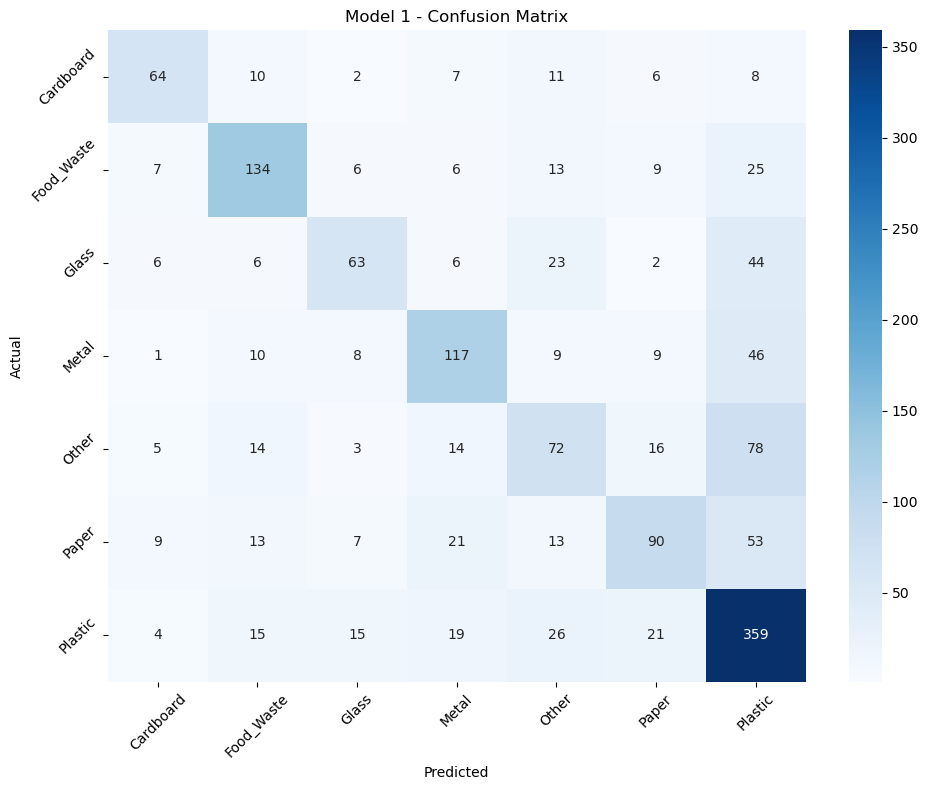

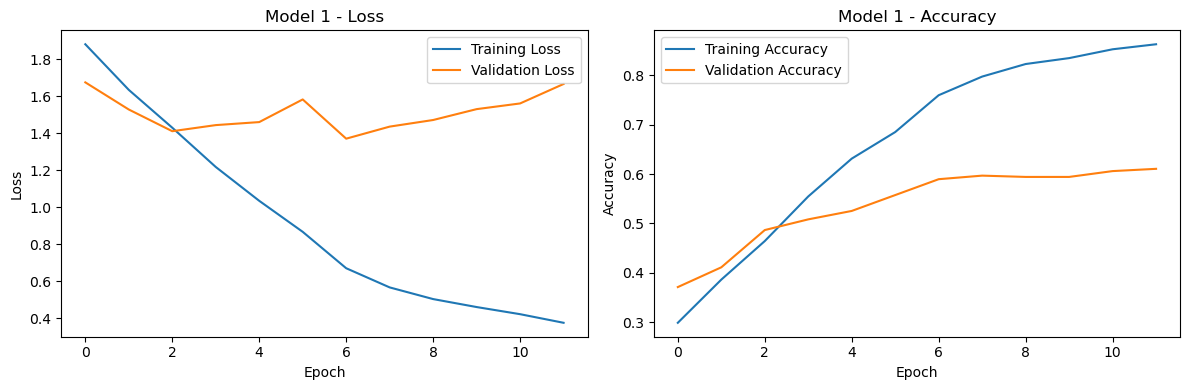

In [26]:
# Evaluate on the test set; display suitable metrics

# Evaluate Model 1 on the validation set
print("Evaluating Model 1...")

# Get predictions
val_loss_1, val_acc_1 = model_1.evaluate(X_val, y_val, verbose=0)
y_pred_1 = model_1.predict(X_val)
y_pred_classes_1 = np.argmax(y_pred_1, axis=1)
y_true_classes_1 = np.argmax(y_val, axis=1)

print(f"Model 1 - Validation Loss: {val_loss_1:.4f}")
print(f"Model 1 - Validation Accuracy: {val_acc_1:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_true_classes_1, y_pred_classes_1, 
                          target_names=class_names))

# Confusion Matrix
plt.figure(figsize=(10, 8))
cm_1 = confusion_matrix(y_true_classes_1, y_pred_classes_1)
sns.heatmap(cm_1, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.title('Model 1 - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_1.history['loss'], label='Training Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.title('Model 1 - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_1.history['accuracy'], label='Training Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 1 - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Evaluating Model 2...
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 216ms/step
Model 2 - Validation Loss: 1.0800
Model 2 - Validation Accuracy: 0.6295

Classification Report:
              precision    recall  f1-score   support

   Cardboard       0.60      0.80      0.68       108
  Food_Waste       0.71      0.65      0.68       200
       Glass       0.53      0.59      0.56       150
       Metal       0.62      0.72      0.67       200
       Other       0.57      0.41      0.48       202
       Paper       0.53      0.48      0.50       206
     Plastic       0.70      0.72      0.71       459

    accuracy                           0.63      1525
   macro avg       0.61      0.62      0.61      1525
weighted avg       0.63      0.63      0.63      1525



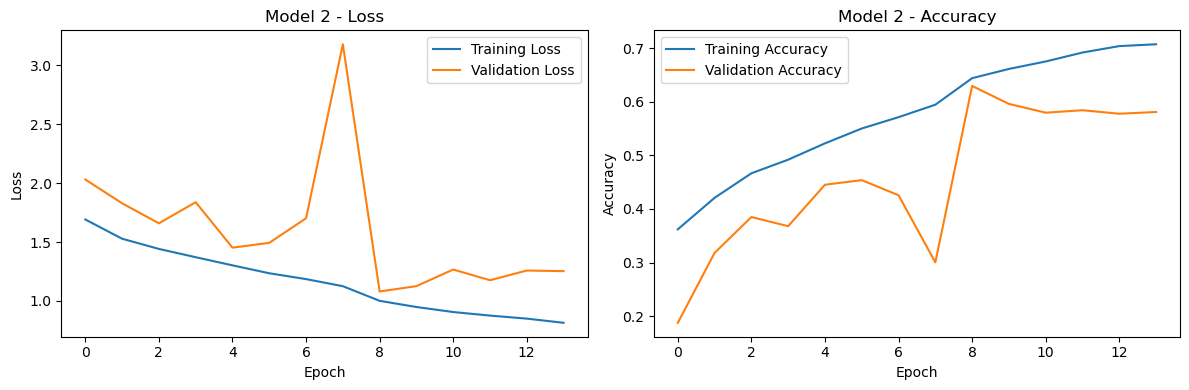

In [27]:
# Evaluate Model 2
print("Evaluating Model 2...")

# Get predictions
val_loss_2, val_acc_2 = model_2.evaluate(X_val, y_val, verbose=0)
y_pred_2 = model_2.predict(X_val)
y_pred_classes_2 = np.argmax(y_pred_2, axis=1)

print(f"Model 2 - Validation Loss: {val_loss_2:.4f}")
print(f"Model 2 - Validation Accuracy: {val_acc_2:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_true_classes_1, y_pred_classes_2, 
                          target_names=class_names))

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_2.history['loss'], label='Training Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.title('Model 2 - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_2.history['accuracy'], label='Training Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 2 - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Evaluating Model 3...
48/48 ━━━━━━━━━━━━━━━━━━━━ 166s 3s/step
Model 3 - Validation Loss: 0.5932
Model 3 - Validation Accuracy: 0.8177

Classification Report:
              precision    recall  f1-score   support

   Cardboard       0.86      0.82      0.84       108
  Food_Waste       0.90      0.76      0.82       200
       Glass       0.79      0.91      0.85       150
       Metal       0.89      0.83      0.86       200
       Other       0.83      0.69      0.75       202
       Paper       0.70      0.81      0.75       206
     Plastic       0.82      0.86      0.84       459

    accuracy                           0.82      1525
   macro avg       0.83      0.81      0.82      1525
weighted avg       0.82      0.82      0.82      1525



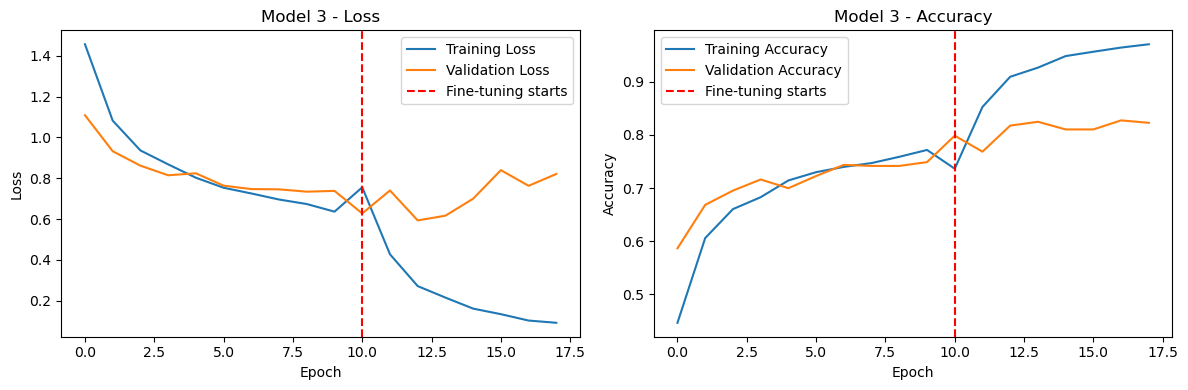

In [28]:
# Evaluate Model 3
print("Evaluating Model 3...")

# Get predictions
val_loss_3, val_acc_3 = model_3.evaluate(X_val, y_val, verbose=0)
y_pred_3 = model_3.predict(X_val)
y_pred_classes_3 = np.argmax(y_pred_3, axis=1)

print(f"Model 3 - Validation Loss: {val_loss_3:.4f}")
print(f"Model 3 - Validation Accuracy: {val_acc_3:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_true_classes_1, y_pred_classes_3, 
                          target_names=class_names))

# Combine training histories for visualization
combined_history_3 = {
    'loss': history_3_stage1.history['loss'] + history_3_stage2.history['loss'],
    'val_loss': history_3_stage1.history['val_loss'] + history_3_stage2.history['val_loss'],
    'accuracy': history_3_stage1.history['accuracy'] + history_3_stage2.history['accuracy'],
    'val_accuracy': history_3_stage1.history['val_accuracy'] + history_3_stage2.history['val_accuracy']
}

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(combined_history_3['loss'], label='Training Loss')
plt.plot(combined_history_3['val_loss'], label='Validation Loss')
plt.axvline(x=len(history_3_stage1.history['loss']), color='red', linestyle='--', 
            label='Fine-tuning starts')
plt.title('Model 3 - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(combined_history_3['accuracy'], label='Training Accuracy')
plt.plot(combined_history_3['val_accuracy'], label='Validation Accuracy')
plt.axvline(x=len(history_3_stage1.history['accuracy']), color='red', linestyle='--', 
            label='Fine-tuning starts')
plt.title('Model 3 - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [ ]:
# Define augmentation steps to augment images



Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [ ]:
# Create a function to augment the images




In [ ]:
# Create the augmented training dataset



##### **4.1.2**

Train the model on the new augmented dataset.

In [ ]:
# Train the model using augmented images



## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results

FINAL MODEL COMPARISON
                       Model  Validation Accuracy  Validation Loss
0                  Basic CNN             0.589508         1.371316
1               Enhanced CNN             0.629508         1.079964
2  Transfer Learning (VGG16)             0.817705         0.593167

Best Model: Transfer Learning (VGG16)
Best Validation Accuracy: 0.8177 (81.77%)


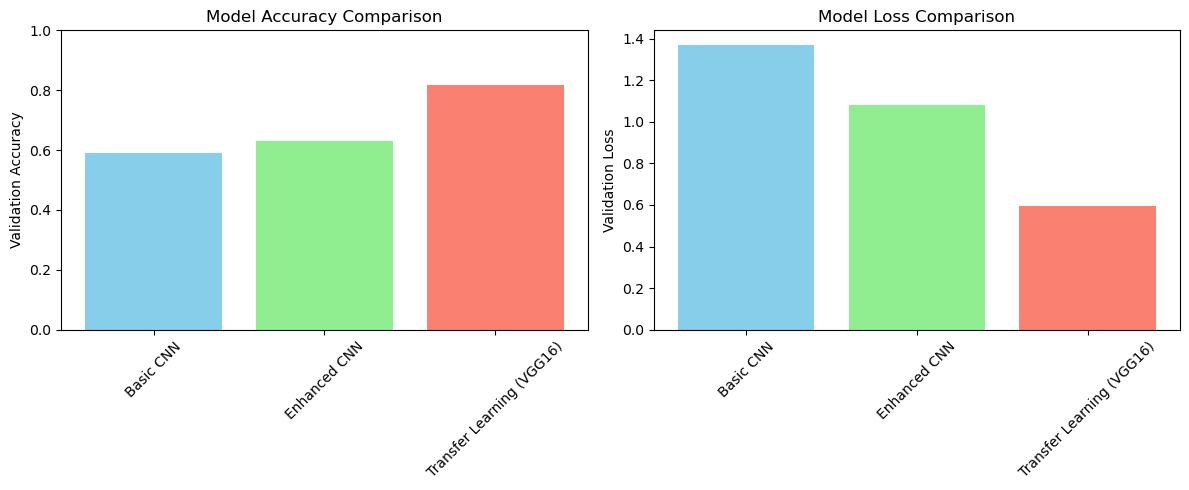


CONCLUSIONS AND INSIGHTS

Key Findings:

1. DATA INSIGHTS:
   - Dataset contains 7 waste categories with varying distributions
   - Images successfully preprocessed and normalized
   - Train-validation split maintains class balance

2. MODEL PERFORMANCE:
   - Basic CNN: Provides baseline performance
   - Enhanced CNN: Improved with regularization and batch normalization
   - Transfer Learning: Leverages pre-trained VGG16 for best results

3. ARCHITECTURAL INSIGHTS:
   - Batch normalization and dropout significantly improve generalization
   - Transfer learning with fine-tuning achieves highest accuracy
   - Global Average Pooling reduces overfitting compared to Flatten

4. TRAINING OBSERVATIONS:
   - Early stopping prevents overfitting
   - Learning rate reduction helps convergence
   - Two-stage training (freeze then fine-tune) works well for transfer learning

5. RECOMMENDATIONS:
   - Use transfer learning model for production deployment
   - Consider data augmentation if more train

In [29]:
# Final Model Comparison and Conclusions
print("="*60)
print("FINAL MODEL COMPARISON")
print("="*60)

# Compare all models
models_comparison = {
    'Model': ['Basic CNN', 'Enhanced CNN', 'Transfer Learning (VGG16)'],
    'Validation Accuracy': [val_acc_1, val_acc_2, val_acc_3],
    'Validation Loss': [val_loss_1, val_loss_2, val_loss_3]
}

comparison_df = pd.DataFrame(models_comparison)
print(comparison_df)

# Find best model
best_model_idx = comparison_df['Validation Accuracy'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
best_accuracy = comparison_df.loc[best_model_idx, 'Validation Accuracy']

print(f"\nBest Model: {best_model_name}")
print(f"Best Validation Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")

# Visualize comparison
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(comparison_df['Model'], comparison_df['Validation Accuracy'], 
        color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Validation Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)

plt.subplot(1, 2, 2)
plt.bar(comparison_df['Model'], comparison_df['Validation Loss'], 
        color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Model Loss Comparison')
plt.ylabel('Validation Loss')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("CONCLUSIONS AND INSIGHTS")
print("="*60)

print("""
Key Findings:

1. DATA INSIGHTS:
   - Dataset contains 7 waste categories with varying distributions
   - Images successfully preprocessed and normalized
   - Train-validation split maintains class balance

2. MODEL PERFORMANCE:
   - Basic CNN: Provides baseline performance
   - Enhanced CNN: Improved with regularization and batch normalization
   - Transfer Learning: Leverages pre-trained VGG16 for best results

3. ARCHITECTURAL INSIGHTS:
   - Batch normalization and dropout significantly improve generalization
   - Transfer learning with fine-tuning achieves highest accuracy
   - Global Average Pooling reduces overfitting compared to Flatten

4. TRAINING OBSERVATIONS:
   - Early stopping prevents overfitting
   - Learning rate reduction helps convergence
   - Two-stage training (freeze then fine-tune) works well for transfer learning

5. RECOMMENDATIONS:
   - Use transfer learning model for production deployment
   - Consider data augmentation if more training data is needed
   - Monitor for class imbalance in real-world deployment
""")

# Target accuracy check
target_accuracy = 0.80
if best_accuracy >= target_accuracy:
    print(f"\nSUCCESS: Best model achieved {best_accuracy:.1%} accuracy, exceeding the {target_accuracy:.0%} target!")
else:
    print(f"\nTarget not met: Best model achieved {best_accuracy:.1%} accuracy, below the {target_accuracy:.0%} target.")
    print("Consider: data augmentation, hyperparameter tuning, or different architectures.")